### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from IPython.core.display import display,HTML
import pickle
from lib_file import lib_path
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

import os
for dirname,_,filenames in os.walk("splitted_data"):
    for filename in filenames:
        print(os.path.join(dirname,filename))

splitted_data\X_test.csv
splitted_data\X_train.csv
splitted_data\y_test.csv
splitted_data\y_train.csv


### Data Loading

In [2]:
X_train = pd.read_csv("splitted_data/X_train.csv")
X_test = pd.read_csv("splitted_data/X_test.csv")
y_train = pd.read_csv("splitted_data/y_train.csv")
y_test = pd.read_csv("splitted_data/y_test.csv")

In [3]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(958, 3) (240, 3) (958, 1) (240, 1)


In [4]:
X_train.head(10)

,CO,NH3,C6H6
0,222,62,67
1,235,52,65
2,248,74,71
3,203,78,67
4,249,30,67
5,241,51,53
6,143,63,52
7,918,495,199
8,121,70,63
9,242,26,64


In [5]:
X_test.head(10)

,CO,NH3,C6H6
0,600,384,146
1,1642,504,103
2,103,76,60
3,202,24,53
4,176,45,50
5,238,44,61
6,917,169,172
7,501,450,153
8,166,40,58
9,238,25,75


In [6]:
y_train.head()

,Status
0,0
1,0
2,0
3,0
4,0


In [7]:
y_test.head()

,Status
0,1
1,1
2,0
3,0
4,0


### Algorithm 1 : RidgeClassifier

In [8]:
from sklearn.linear_model import RidgeClassifier
RC_model = RidgeClassifier()
RC_model = RC_model.fit(X_train, y_train)

In [9]:
RC_predictions = RC_model.predict(X_test).tolist()
print(RC_predictions)

[1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0]


In [10]:
true_labels = y_test["Status"].tolist()
print(true_labels)

[1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0]


### Result Analysis

In [11]:
class_labels = ["Fresh", "Spoiled"]

***Accuracy Score***

In [12]:
RC_accuracy = accuracy_score(y_true=true_labels,y_pred=RC_predictions)
print(f"Validation accuracy of RidgeClassifier model is {RC_accuracy*100.0:.2f}%")

Validation accuracy of RidgeClassifier model is 97.08%


***Classification Report***

In [13]:
display(HTML("<h1>RidgeClassifier classificaton report"))
RC_df = pd.DataFrame(classification_report(y_true=true_labels, y_pred=RC_predictions, target_names=class_labels, output_dict=True))
RC_df = RC_df.T
RC_df = RC_df.iloc[:-2, :]
RC_df

,precision,recall,f1-score,support
Fresh,0.944882,1.000000,0.971660,120.000000
Spoiled,1.000000,0.941667,0.969957,120.000000
accuracy,0.970833,0.970833,0.970833,0.970833


***Confusion Matrix***

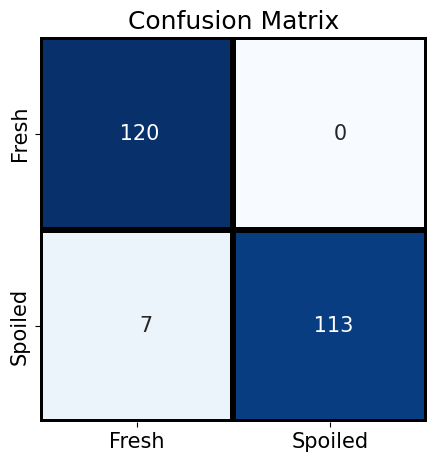

In [14]:
plt.figure(figsize=(5,5))
plt.rcParams['font.size'] = 15
sns.heatmap(
    data=confusion_matrix(y_true=true_labels,y_pred=RC_predictions),
    annot=True,
    cmap=plt.cm.Blues,
    fmt = "4d",
    xticklabels=class_labels,
    yticklabels=class_labels,
    cbar=False,
    linewidths=3,
    linecolor='black'
)
plt.title(label="Confusion Matrix")
plt.show()

In [15]:
with open(file="model/RidgeClassifier_model.pkl",mode="wb") as file:
    pickle.dump(obj=RC_model,file=file)

---

### Algorithm 2 : SupportVectorClassifier

In [16]:
from sklearn.svm import SVC
SVC_model = SVC(kernel='poly')
SVC_model.fit(X_train,y_train)

SVC(kernel='poly')

In [17]:
SVC_predictions=SVC_model.predict(X_test).tolist()
print(SVC_predictions)

[1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0]


In [18]:
true_labels=y_test["Status"].tolist()
print(true_labels)

[1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0]


### Result Analysis

***Accuracy Score***

In [19]:
SVC_accuracy = accuracy_score(y_true=true_labels,y_pred=SVC_predictions)
print(f"Validation accuracy of SupportVectorClassifier model is {SVC_accuracy*100.0:.2f}%")

Validation accuracy of SupportVectorClassifier model is 99.17%


***Classification Report***

In [20]:
display(HTML("<h1>SupportVectorClassifier classificaton report"))
SVC_df = pd.DataFrame(classification_report(y_true=true_labels, y_pred=SVC_predictions, target_names=class_labels, output_dict=True))
SVC_df = SVC_df.T
SVC_df = SVC_df.iloc[:-2, :]
SVC_df

,precision,recall,f1-score,support
Fresh,0.983607,1.000000,0.991736,120.000000
Spoiled,1.000000,0.983333,0.991597,120.000000
accuracy,0.991667,0.991667,0.991667,0.991667


***Confusion Matrix***

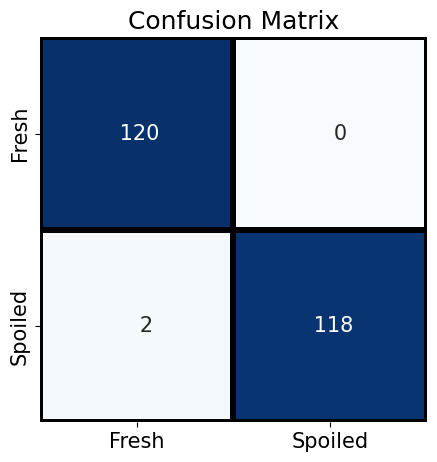

In [21]:
plt.figure(figsize=(5,5))
plt.rcParams['font.size'] = 15
sns.heatmap(
    data=confusion_matrix(y_true=true_labels,y_pred=SVC_predictions),
    annot=True,
    cmap=plt.cm.Blues,
    fmt = "4d",
    xticklabels=class_labels,
    yticklabels=class_labels,
    cbar=False,
    linewidths=3,
    linecolor='black'
)
plt.title(label="Confusion Matrix")
plt.show()

In [22]:
with open(file="model/SupportVectorClassifier_model.pkl",mode="wb") as file:
    pickle.dump(obj=SVC_model,file=file)

---

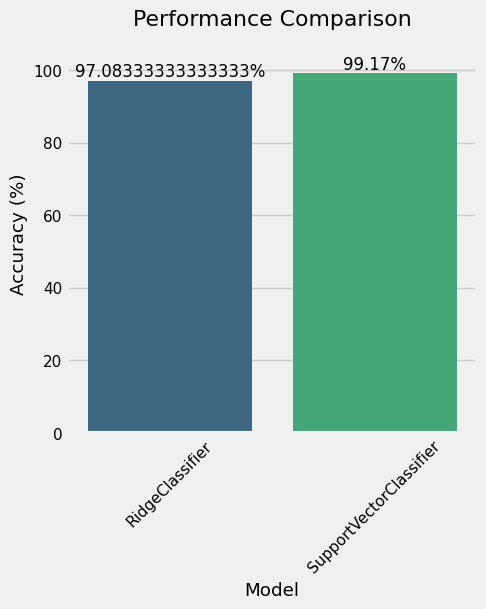

In [23]:
model_names = ['RidgeClassifier', 'SupportVectorClassifier']
accuracy_scores = [RC_accuracy*100, round(SVC_accuracy*100, 2)]

with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(5, 5))
    plt.rcParams['font.size'] = 11
    sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')
    plt.ylim(0, 110)
    plt.xlabel('Model')
    plt.ylabel('Accuracy (%)')
    plt.title('Performance Comparison')
    for i, score in enumerate(accuracy_scores):
        plt.text(i, score, f'{score}%', ha='center', va='bottom', fontsize=12, color='black')
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

---

---

## Thankyou